<a href="https://colab.research.google.com/github/CodeJaymes/Machine-Learn/blob/DL/Handwriting_Recognition_using_Tensorflow%2C_Keras_%26_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
(x_train , y_train) , (x_test ,  y_test) =  keras.datasets.mnist.load_data()

In [36]:
#x_train =  x_train/255
#y_train  = y_train/255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

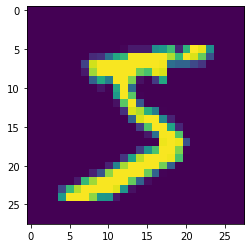

In [37]:
plt.imshow(x_train[0])


In [38]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened  = x_test.reshape(len(x_test),28*28)

In [91]:
x_train_flatten_normal = x_train_flattened/255
x_test_flatten_normal = x_test_flattened/255

In [92]:
model  =  keras.Sequential([
                            keras.layers.Flatten(input_shape = (28,28)) ,
                            keras.layers.Dense(100, activation =  'relu'),
                            keras.layers.Dense(10, input_shape =(784,) , activation = 'sigmoid')
                            
                          ])
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train_flatten_normal, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2723 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1250 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9841


In [93]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.6638 - accuracy: 0.9754


[13.66384506225586, 0.9753999710083008]

In [94]:
predicted = model.predict(x_test_flattened)

In [96]:
predict_a =  np.argmax(predicted[0])
print(predict_a)

2


In [98]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [76]:
y_predict  =  [np.argmax(i) for i in predicted]
y_predict[:5]

[3, 2, 1, 0, 4]

In [78]:
cm  =  tf.math.confusion_matrix(labels = y_test, predictions =  y_predict)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    0,    1,    2,    0,    2,    0],
       [   0, 1123,    4,    1,    0,    2,    2,    1,    2,    0],
       [  72,   98,  826,    5,    9,    0,    4,    2,   14,    2],
       [  32,    5,  186,  773,    1,    5,    1,    2,    5,    0],
       [   7,    5,    9,   16,  929,    0,    6,    1,    9,    0],
       [  67,    8,   34,  244,   28,  481,    9,    2,   18,    1],
       [  74,    5,  246,    2,   60,   46,  523,    1,    1,    0],
       [  21,   22,   62,  376,   58,    3,    0,  482,    4,    0],
       [  19,   39,   68,  156,   26,   90,   20,   12,  543,    1],
       [  14,   12,    3,   96,  507,    9,    0,  193,   87,   88]],
      dtype=int32)>

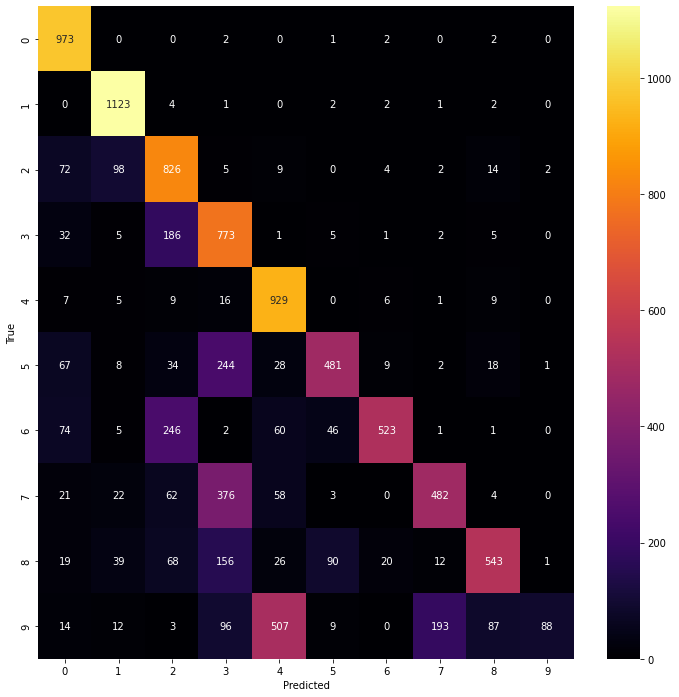

In [99]:
import seaborn as sns 
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot = True , cmap ='inferno', fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()